# POLICY ITERATION


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from utils import plot_policy, test_agent

In [ ]:
!pip install gym
import gym

## Initialize the environment

In [ ]:
from envs import Maze

/usr/local/lib/python3.11/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-pa

In [ ]:
env = Maze()

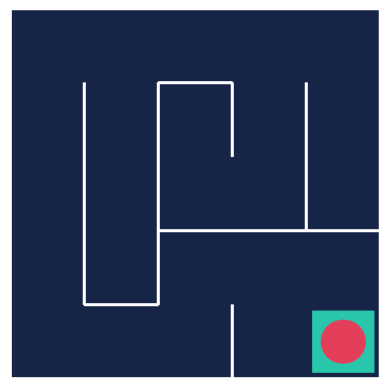

In [ ]:
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.imshow(frame)
plt.show()

In [ ]:
print(f'Observation space shape: {env.observation_space.nvec}')
print(f'Number of actions: {env.action_space.n}')

Observation space shape: [5 5]
Number of actions: 4


## Define the policy

### Create the policy

In [ ]:
policy_probs = np.full((5,5,4), 0.25)

In [ ]:
policy_probs

array([[[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]],

       [[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]],

       [[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]],

       [[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]],

       [[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]]])

In [ ]:
def policy(state):
  return policy_probs[state]

## Test the policy with state (0,0)

In [ ]:
action_probabilities = policy((0,0))
for action, prob in enumerate(action_probabilities):
  print(f'Probability of taking action {action}: {prob}')

Probability of taking action 0: 0.25
Probability of taking action 1: 0.25
Probability of taking action 2: 0.25
Probability of taking action 3: 0.25


## See how the random policy does in the maze

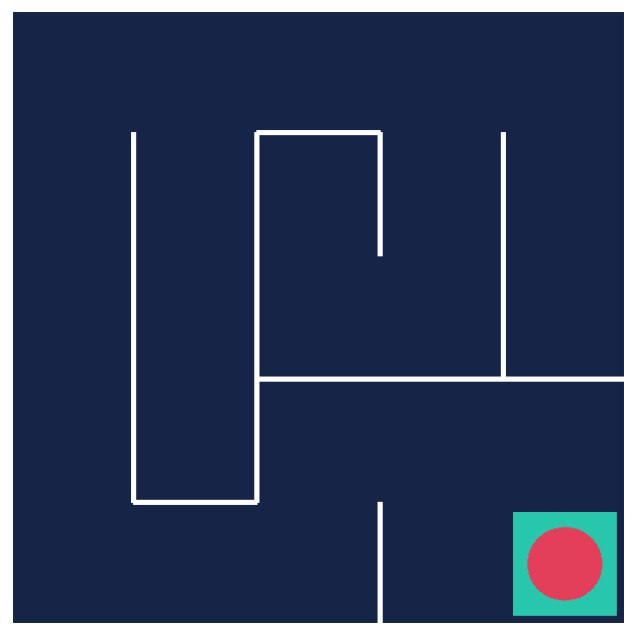

In [ ]:
test_agent(env, policy, episodes =1)


## Plot the policy

In [ ]:
np.object = object

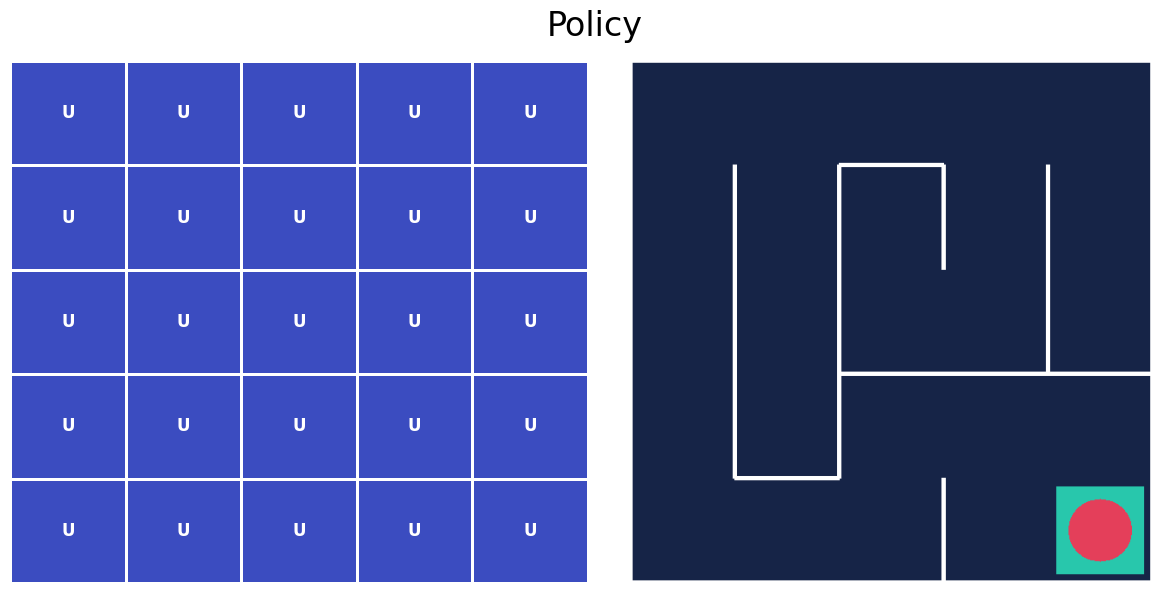

In [ ]:
plot_policy(policy_probs, frame)

## Define value table V(s)

### Create the V(s) Table

In [ ]:
state_values = np.zeros(shape=(5,5))

Plot V

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from utils import plot_policy, test_agent, plot_values

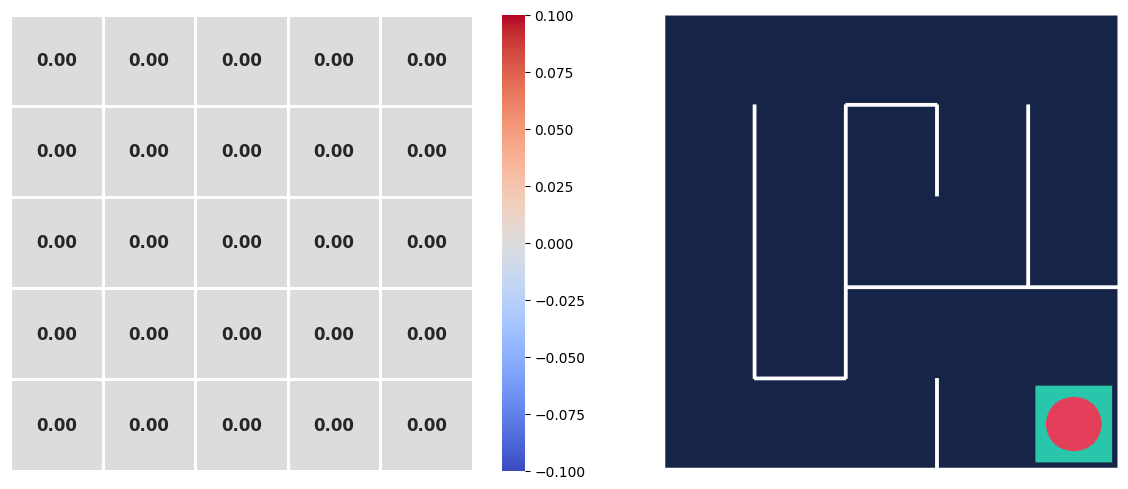

In [ ]:
plot_values(state_values, frame)

# Implement Policy Iteration

In [ ]:
def policy_evaluation(policy_probs, state_values, theta=1e-6, gamma=0.99):
  delta = float('inf')

  while delta > theta:
    delta = 0

    for row in range(5):
      for col in range(5):
        old_value = state_values[(row,col)]
        new_value = 0
        action_probabilities = policy_probs[(row,col)]

        for action, prob in enumerate(action_probabilities):
          next_state, reward, done, info = env.step(action)
          new_value += prob * (reward + gamma * state_values[next_state])

        state_values[(row, col)] = new_value
        delta = max(delta, abs(old_value - new_value))

  return state_values

In [ ]:
def policy_improvement(policy_probs, state_values, gamma=0.99):
  policy_stable = True

  for row in range(5):
    for col in range(5):
      old_action = np.argmax(policy_probs[(row,col)])
      new_action = None
      max_qsa = float('-inf')
      for action in range(4):
        next_state, reward, done, info = env.simulate_step((row,col), action)
        qsa = reward + gamma * state_values[next_state]

        if qsa > max_qsa:
          max_value = qsa
          new_action = action

      action_probs = np.zeros(4)
      action_probs[new_action] = 1.
      policy_probs[(row,col)] = action_probs

      if new_action != old_action:
        policy_stable = False

  return policy_stable


In [ ]:
def policy_iteration(policy_probs, state_values, theta=1e-6, gamma=0.99):
  policy_stable = False

  while not policy_stable:
    policy_evaluation(policy_probs, state_values, theta, gamma)
    policy_stable = policy_improvement(policy_probs, state_values, gamma)

In [ ]:
policy_iteration(policy_probs, state_values)

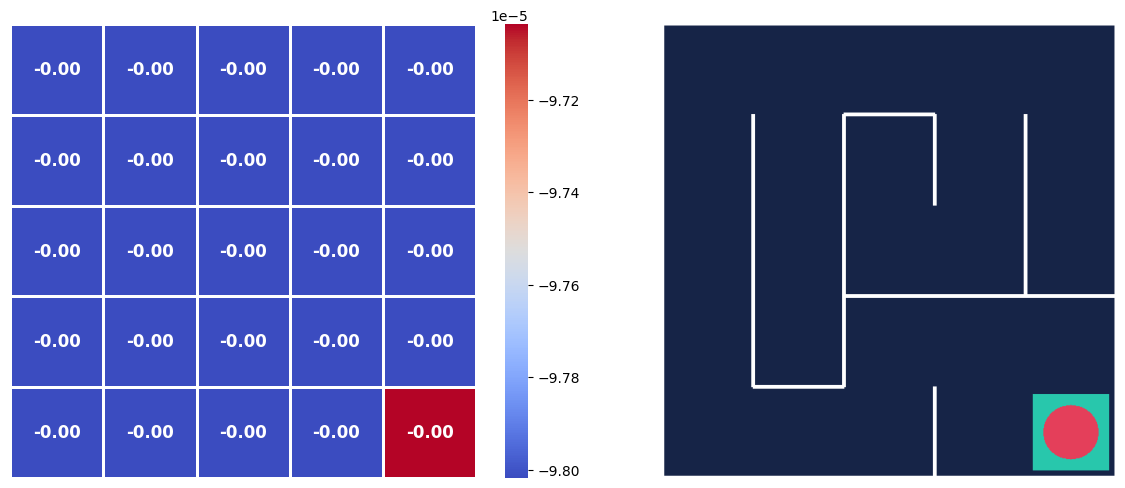

In [ ]:
plot_values(state_values, frame)

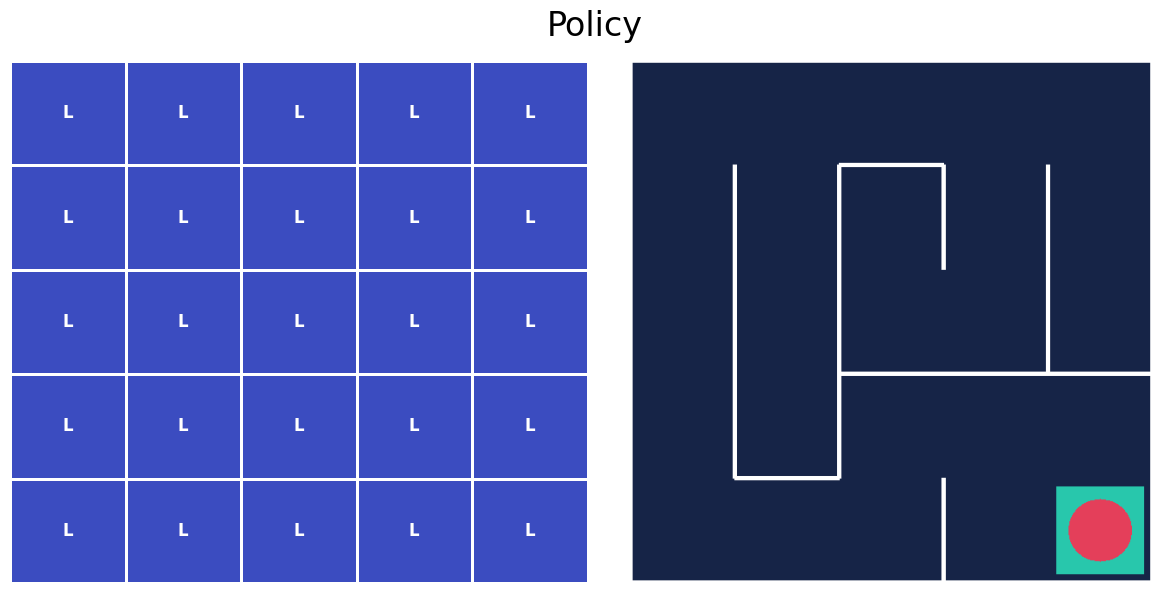

In [ ]:
plot_policy(policy_probs, frame)